<a href="https://colab.research.google.com/github/Psyclophe/Data-Scientist/blob/main/Wal_mart_analysis_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import datetime as dt
import prophet as ppt
import warnings
warnings.filterwarnings ("ignore")
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## sección 1.***Obtención de Datos***





In [ ]:
#se cargan los datos de entrada proporcionado en el proyecto de las tiendas Wal-mart, 
#asimismo se hace la conexión de los datos a Github mostrado en la siguiente ruta
#de la misma forma se indica a Python muestre los primeros " 20 " registros

url = 'https://raw.githubusercontent.com/Psyclophe/Data-Scientist/main/Walmart_Store_sales.csv'
df = pd.read_csv (url)

df.head(20)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106
6,1,19-03-2010,1472515.79,0,54.58,2.720,211.215635,8.106
7,1,26-03-2010,1404429.92,0,51.45,2.732,211.018042,8.106
8,1,02-04-2010,1594968.28,0,62.27,2.719,210.820450,7.808
9,1,09-04-2010,1545418.53,0,65.86,2.770,210.622857,7.808


## sección 2. **Análisis Exploratorio**
en esta sección del codigo se procede a realizar el análisis de la información proporcionada

In [ ]:
#para identificar los datos nulos se indica a Pthoin que nos muestre los datos y, poder detectar la cantidad de datos nulos

df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [ ]:
#con la carga de información y con esta funcion se pide a Python indicar el tipo de dato de cada columna, 
#para analizar si es necesario hacer cambios en el tipo de dato en el dataframe y poder tener datos homógeneos
#se identifico que "Date" es un dato que es objeto y se debe convertir a dato fecha

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
#en esta función se pide a Python convertir los datos objeto a string
#aquí podemos visualizar que el dato que era un objeto "Date" se conviritio al formato fecha en donde se visualiza "datetime64[ns]"

df["Date"]=pd.to_datetime(df["Date"])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


In [ ]:
#con esta funcion se da la instrucción a Python para ver las medidas de tendencia central de las 8 columnas

df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [ ]:
#se da la instruccion a Python que se ordene las fechas de menor a mayor en el archivo que se va a analizar
#casimismo se indica al programa que ordene por fechas, de la mas antigua hasta la más reciente

data_sort=df.sort_values("Date")

data_sort

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
606,5,2010-01-10,283178.12,0,71.10,2.603,212.226946,6.768
2036,15,2010-01-10,566945.95,0,59.69,2.840,132.756800,8.067
5897,42,2010-01-10,481523.93,0,86.01,3.001,126.234600,9.003
4610,33,2010-01-10,224294.39,0,91.45,3.001,126.234600,9.265
5039,36,2010-01-10,422169.47,0,74.66,2.567,210.440443,8.476
...,...,...,...,...,...,...,...,...
5860,41,2012-12-10,1409544.97,0,39.38,3.760,199.053937,6.195
2285,16,2012-12-10,491817.19,0,43.26,3.760,199.053937,5.847
1427,10,2012-12-10,1713889.11,0,76.03,4.468,131.108333,6.943
3572,25,2012-12-10,697317.41,0,43.74,4.000,216.115057,7.293


In [ ]:
#con la funcion "groupby" se indica a Python agrupar y sumar, por tienda y por semana, al ejecutar la función Python
#agrega e indexa la columna "0" a la columna "1" como identificador

group=df.groupby("Store").sum("Weekly_Sales")/1000
# buscar alternativa para formato de números
group.reset_index(level=0, inplace=True)

group

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,222402.80885,0.01,9.76787,0.460417,30.887556,1.088290
1,2,275382.44098,0.01,9.75494,0.460417,30.837422,1.090210
2,3,57586.73507,0.01,10.21509,0.460417,31.372989,1.026309
3,4,299543.95338,0.01,8.90223,0.460027,18.401193,0.852951
4,5,45475.68890,0.01,9.92565,0.460417,30.968878,0.900243
5,6,223756.13064,0.01,9.96710,0.460417,31.110107,0.944787
6,7,81598.27514,0.01,5.68000,0.463543,27.693987,1.227760
7,8,129951.18113,0.01,8.93950,0.460417,31.379781,0.871134
8,9,77789.21899,0.01,9.69185,0.460417,31.406617,0.872283
9,10,271617.71389,0.01,10.33049,0.511357,18.401193,1.195904


In [ ]:
#se solicita a Python ordenar por tienda y por volumen de ventas

sort_WS=group.sort_values('Weekly_Sales', ascending=False)

sort_WS

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
19,20,301397.79246,0.01,7.92955,0.488718,29.892453,1.054112
3,4,299543.95338,0.01,8.90223,0.460027,18.401193,0.852951
13,14,288999.91134,0.01,8.26411,0.488718,26.638852,1.236771
12,13,286517.70380,0.01,7.67869,0.469919,18.401193,1.001261
1,2,275382.44098,0.01,9.75494,0.460417,30.837422,1.090210
9,10,271617.71389,0.01,10.33049,0.511357,18.401193,1.195904
26,27,253855.91688,0.01,8.19549,0.511696,19.878614,1.144250
5,6,223756.13064,0.01,9.96710,0.460417,31.110107,0.944787
0,1,222402.80885,0.01,9.76787,0.460417,30.887556,1.088290
38,39,207445.54247,0.01,10.09542,0.460417,30.706257,1.125274


In [ ]:
#es este script se solicita a Python calcular la Desviacioón Estandar por tienda, ordenando de la mayor a la menor

Store_order = df.groupby('Store')['Weekly_Sales'].std()
Store_order = pd.DataFrame(Store_order)
Store_order_sort=Store_order.sort_values('Weekly_Sales', ascending=False)

Store_order_sort

,Weekly_Sales
Store,
14,317569.949476
10,302262.062504
20,275900.562742
4,266201.442297
13,265506.995776
23,249788.038068
27,239930.135688
2,237683.694682
39,217466.454833


In [ ]:
#con esta instrucción se pide a Python identificar los días festivos

df[df["Holiday_Flag"]==1]

df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [ ]:
#con esta instrucción se definen los Días festivos que se encontraron en el dataframe

Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labor_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgivig_Day =  ['26-11-2010', '25-11-2011', '23-11-2012']
Xmas = ['31-12-2010', '30-12-2011', '28-12-2012']

In [ ]:
#con esta instrucción se pide a Python determinar la media de ventas en días_festivos

Sales_Super_Bowl= (pd.DataFrame(df.loc[df.Date.isin(Super_Bowl)]))['Weekly_Sales'].mean()
Sales_Labor_Day = (pd.DataFrame(df.loc[df.Date.isin(Labor_Day)]))['Weekly_Sales'].mean()
Sales_Thanksgivig_Day = (pd.DataFrame(df.loc[df.Date.isin(Thanksgivig_Day)]))['Weekly_Sales'].mean()
Sales_Xmas = (pd.DataFrame(df.loc[df.Date.isin(Xmas)]))['Weekly_Sales'].mean()

{Sales_Super_Bowl, Sales_Labor_Day, Sales_Thanksgivig_Day, Sales_Xmas}

{960833.1115555555, 1042427.293925926, 1079127.9877037038, 1471273.427777778}

In [ ]:
#con esta instrucción se pide a Python determinar la media de ventas de los dias no_festivos

Sales_no_Holiday = df[df['Holiday_Flag'] == 0 ]['Weekly_Sales'].mean()

{Sales_no_Holiday}

{1041256.3802088555}

In [ ]:
#con esta instrucción se pide a Python determinar la media de ventas 
Average_sales = {'Sales_Super_Bowl' : Sales_Super_Bowl,
                 'Sales_Labor_Day': Sales_Labor_Day,
                 'Sales_Thanksgiving_Day':Sales_Thanksgivig_Day,
                 'Sales_Xmas': Sales_Xmas,
                 'Sales_no_Holiday': Sales_no_Holiday}

Average_sales 

{'Sales_Super_Bowl': 1079127.9877037038,
 'Sales_Labor_Day': 1042427.293925926,
 'Sales_Thanksgiving_Day': 1471273.427777778,
 'Sales_Xmas': 960833.1115555555,
 'Sales_no_Holiday': 1041256.3802088555}

In [ ]:
#store1 = df[df["Store"]==1]
#store1 = store1.sort_values('Date')
#store1

In [ ]:
fig = px.box(data_sort, y = "Weekly_Sales", x = "Store",  color = "Store")
fig.show()

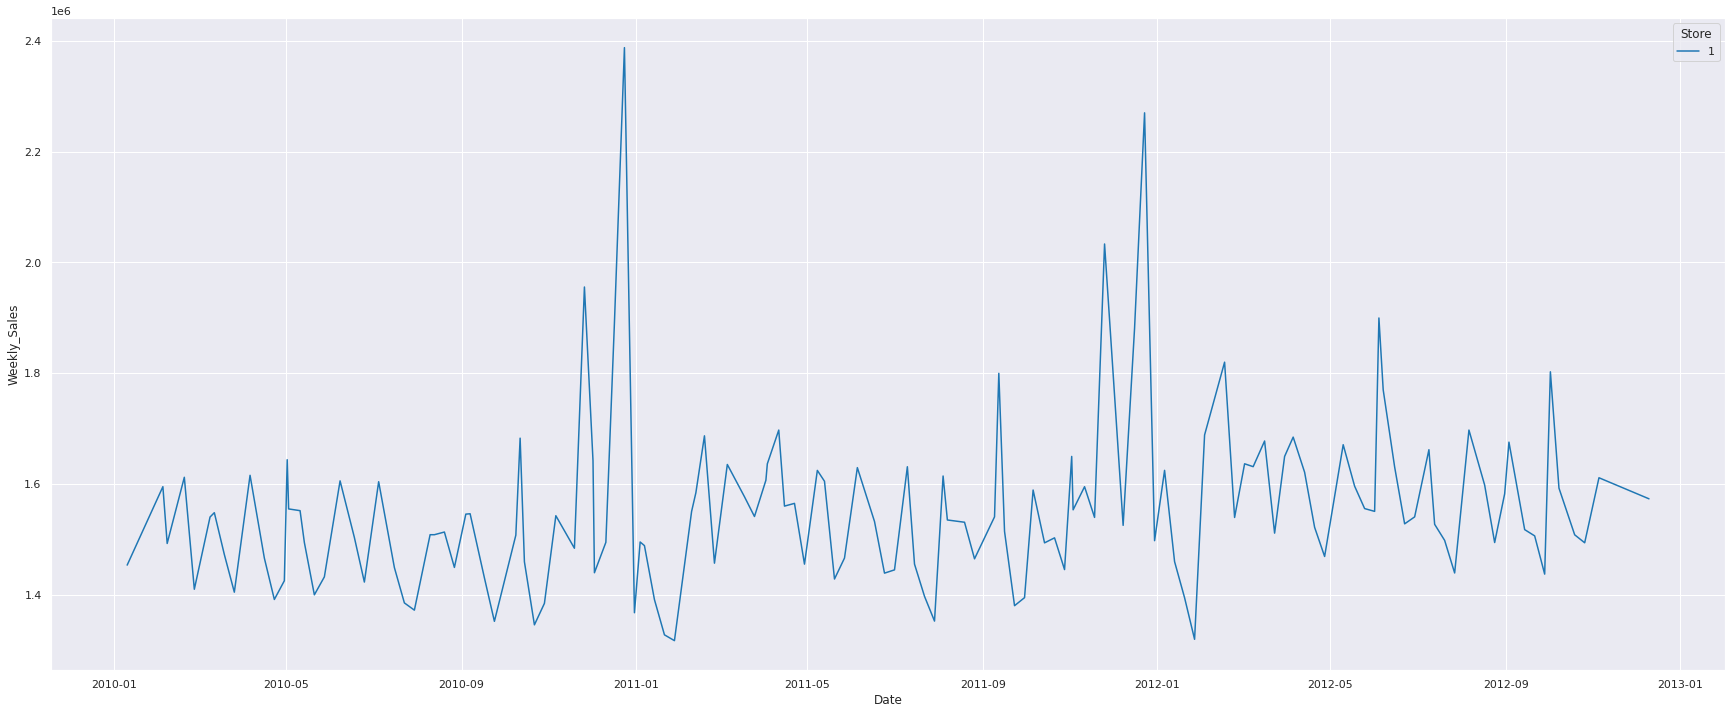

In [ ]:
sns.set_theme(style='darkgrid')
plt.figure(figsize=(30,12))
sns.lineplot(data=store1, x='Date', y='Weekly_Sales', hue='Store', palette='tab10')
plt.show()

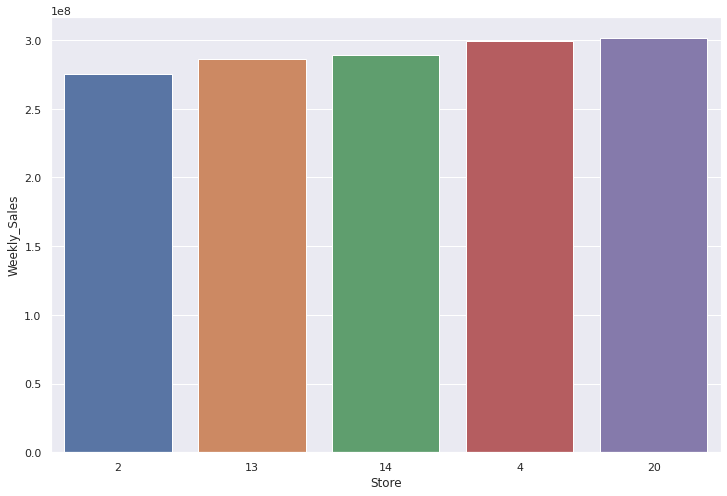

In [ ]:
f, ax=plt.subplots(figsize=(12,8))
sns.barplot(x='Store', y='Weekly_Sales', data=sort5, order=sort5.sort_values('Weekly_Sales').Store)
plt.show()

In [ ]:
#df_Year=df.groupby('Year')['Weekly_Sales'].sum()
#df_Year

In [ ]:
df[(df['Date'] - pd.to_datetime('2010-02-12')).abs().min()==(df['Date'] - pd.to_datetime('2010-02-12')).abs()]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
21,1,2010-02-07,1492418.14,0,80.91,2.669,211.223533,7.787
164,2,2010-02-07,2003940.64,0,82.74,2.669,210.880373,8.099
307,3,2010-02-07,381151.72,0,82.20,2.669,214.546322,7.346
450,4,2010-02-07,1881337.21,0,73.66,2.668,126.139200,7.372
593,5,2010-02-07,305993.27,0,81.25,2.669,211.780186,6.496
736,6,2010-02-07,1759777.25,0,80.34,2.669,212.746898,6.973
879,7,2010-02-07,575570.77,0,61.31,2.728,189.488260,9.017
1022,8,2010-02-07,852333.75,0,74.78,2.669,214.592812,6.315
1165,9,2010-02-07,528832.54,0,78.55,2.669,214.776503,6.442
1308,10,2010-02-07,1845893.87,0,92.89,2.978,126.139200,9.199


In [71]:
sns.set_theme(style='darkgrid')
plt.figure(figsize(20,8))
sns.lineplot(data=store1, x='Date', y='Weekly_Sales', hue='Store', palette='tab10')
plt.show()

NameError: ignored